#**Install Library**

In [1]:
!pip install folium
!pip install libpysal
!pip install esda
!pip install splot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 21.8 MB/s eta 0:00:00


#**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import libpysal as lps
import esda
from esda.moran import Moran, Moran_Local
from splot.esda import lisa_cluster

#**Select City**

In [3]:
city = 'Toronto'


In [4]:
if city == 'Montreal':
    city_coordinate = [45.50888, -73.56166]
    zoom_level = 10
    listings_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/listings_Montreal_QC_Canada_2022_03_12.csv?raw=true'
    neighbourhoods_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/neighbourhoods_Montreal_QC_Canada.geojson?raw=true'
elif city == 'Quebec City':
    city_coordinate = [46.84885, -71.33402]
    zoom_level = 11
    listings_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/listings_Quebec%20City_QC_Canada_2022_03_09.csv?raw=true'
    neighbourhoods_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/neighbourhoods_Quebec%20City_QC_Canada.geojson?raw=true'
elif city == 'Toronto':
    city_coordinate = [43.69511, -79.31482]
    zoom_level = 11
    listings_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/listings_Toronto_ON_Canada_2022_03_08.csv?raw=true'
    neighbourhoods_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/neighbourhoods_Toronto_ON_Canada.geojson?raw=true'
elif city == 'Vancouver':
    city_coordinate = [49.24966, -123.11934]
    zoom_level = 12
    listings_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/listings_Vancouver_BC_Canada_2022_03_10.csv?raw=true'
    neighbourhoods_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/neighbourhoods_Vancouver_BC_Canada.geojson?raw=true'
elif city == 'Victoria':
    city_coordinate = [48.60732, -123.72977]
    zoom_level = 9
    listings_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/listings_Victoria_BC_Canada_2022_03_29.csv?raw=true'
    neighbourhoods_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/neighbourhoods_Victoria_BC_Canada.geojson?raw=true'
elif city == 'Winnipeg':
    city_coordinate = [49.79507, -97.13845]
    zoom_level = 10
    listings_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/listings_Winnipeg_MB_Canada_2022_06_08.csv?raw=true'
    neighbourhoods_file = r'https://github.com/arifadli/DatasetRepository/blob/main/SpatialAnalysis/ListingPrices/neighbourhoods_Winnipeg_MB_Canada.geojs'

#**Load Data**

In [5]:
df = pd.read_csv(listings_file)
print(f'{df.shape[0]} rows, {df.shape[1]} columns')
df.head(5)

15418 rows, 18 columns


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44419781,Studio Suite | Business Travel,348430184,Avalon,NaN,Annex,43.67127,-79.39461,Entire home/apt,155,2,34,2022-01-30,1.86,33,308,21,STR-2011-HPXRVK
1,44429201,Beautiful & Cozy One Bedroom Condo In Yorkville!,354808129,Erin,NaN,Annex,43.67142,-79.39487,Entire home/apt,120,30,3,2021-10-31,0.17,7,35,2,NaN
2,44429908,Stylish Roncesvalles Private Suite w/ Tech Extras,37415518,Anthony,NaN,Roncesvalles,43.64055,-79.43939,Entire home/apt,95,3,37,2022-02-04,2.78,1,117,35,STR-2012-FVZBHD
3,44430872,Newly Renovated 2nd floor Suite,358865808,Joe,NaN,Weston-Pellam Park,43.66801,-79.45752,Entire home/apt,115,3,4,2022-01-02,1.08,1,79,4,STR-2110-FXJVHD
4,44433011,"Spacious, Cozy 1 Bedroom Loft in downtown Toronto",20355052,Turgut,NaN,Regent Park,43.65806,-79.35499,Entire home/apt,160,28,0,NaN,NaN,1,29,0,NaN


In [6]:
gdf = gpd.read_file(neighbourhoods_file)
print(f'{gdf.shape[0]} rows, {gdf.shape[1]} columns')
gdf.head(5)

140 rows, 3 columns


,neighbourhood,neighbourhood_group,geometry
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ..."
1,The Beaches,None,"MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ..."
2,Scarborough Village,None,"MULTIPOLYGON (((-79.21397 43.72676, -79.21400 ..."
3,South Parkdale,None,"MULTIPOLYGON (((-79.42777 43.62979, -79.42948 ..."
4,South Riverdale,None,"MULTIPOLYGON (((-79.32868 43.64745, -79.32867 ..."


#**Join two datasets and calculate the average price**

In [7]:
gdf_listings = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs='EPSG:4326')
gdf_price = gpd.sjoin(gdf, gdf_listings[['price','geometry']], predicate='contains')
print(f'{gdf_price.shape[0]} rows, {gdf_price.shape[1]} columns')
gdf_price.head(5)

15342 rows, 5 columns


,neighbourhood,neighbourhood_group,geometry,index_right,price
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",4448,94
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",5035,32
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",4817,61
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",6687,59
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",6686,88


In [8]:
#Calculate the average price for each neighbourhood

gdf_temp = gdf_price['price'].groupby([gdf['neighbourhood']]).mean()
gdf_avg_price = gdf.merge(gdf_temp, on='neighbourhood')
gdf_avg_price.rename(columns={'price':'avg_price'}, inplace=True)
print(f'{gdf_avg_price.shape[0]} rows, {gdf_avg_price.shape[1]} columns')
gdf_avg_price.head(5)

140 rows, 4 columns


,neighbourhood,neighbourhood_group,geometry,avg_price
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",62.588608
1,The Beaches,None,"MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ...",174.951049
2,Scarborough Village,None,"MULTIPOLYGON (((-79.21397 43.72676, -79.21400 ...",113.200000
3,South Parkdale,None,"MULTIPOLYGON (((-79.42777 43.62979, -79.42948 ...",116.841410
4,South Riverdale,None,"MULTIPOLYGON (((-79.32868 43.64745, -79.32867 ...",169.979094


#**Create an interactive choropleth map of the average listing price**

In [9]:
map_avg_price = folium.Map(location=city_coordinate, zoom_start=zoom_level)
folium.TileLayer('CartoDB positron').add_to(map_avg_price)
title = f'''<h3 align="center"><b>Airbnb Average Listing Price in {city}, March 2022</b></h3>'''
map_avg_price.get_root().html.add_child(folium.Element(title))

choropleth = folium.Choropleth(
                                geo_data=gdf_avg_price,
                                data=gdf_avg_price,
                                bins=10,
                                columns=['neighbourhood', 'avg_price'],
                                key_on='feature.properties.neighbourhood',
                                line_color='black',
                                line_width=1,
                                fill_color='RdYlGn_r',
                                fill_opacity=0.5,
                                line_opacity=0.5,
                                legend_name='CAD'
            ).add_to(map_avg_price)

choropleth.geojson.add_child(folium.features.GeoJsonTooltip(
                                                            fields=['neighbourhood','avg_price'],
                                                            aliases=['Neighbourhood','Average price'],
                                                            labels=True,
                                                            localize=True))
map_avg_price

#**Create 3 static choropleth maps of the average listing price**

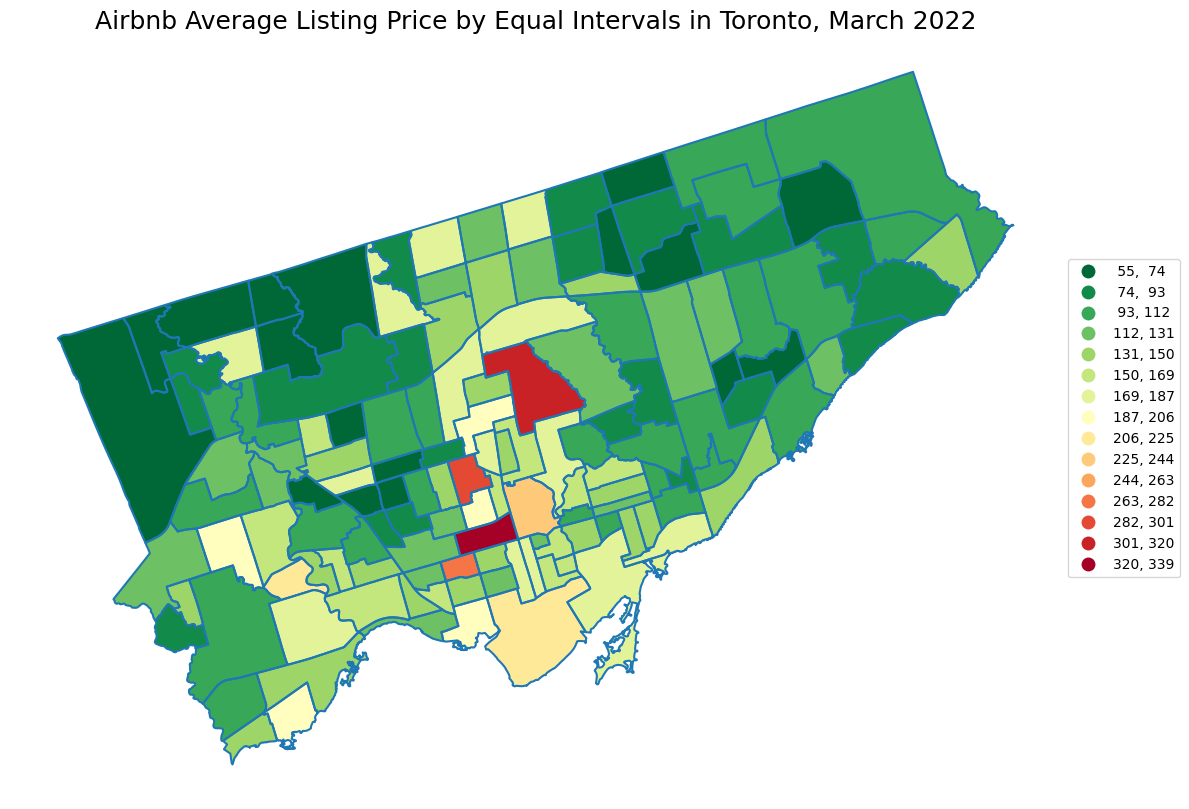

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_avg_price.plot(column='avg_price', scheme='equal_interval', k=15, cmap='RdYlGn_r', legend=True, ax=ax,
                  legend_kwds={'loc':'center left', 'bbox_to_anchor':(1,0.5), 'fmt':"{:.0f}", 'interval':False})
gdf_avg_price.boundary.plot(ax=ax)
plt.title(f'Airbnb Average Listing Price by Equal Intervals in {city}, March 2022', fontsize = 18)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'Airbnb_price_{city}_equal_intervals.png')
plt.show()

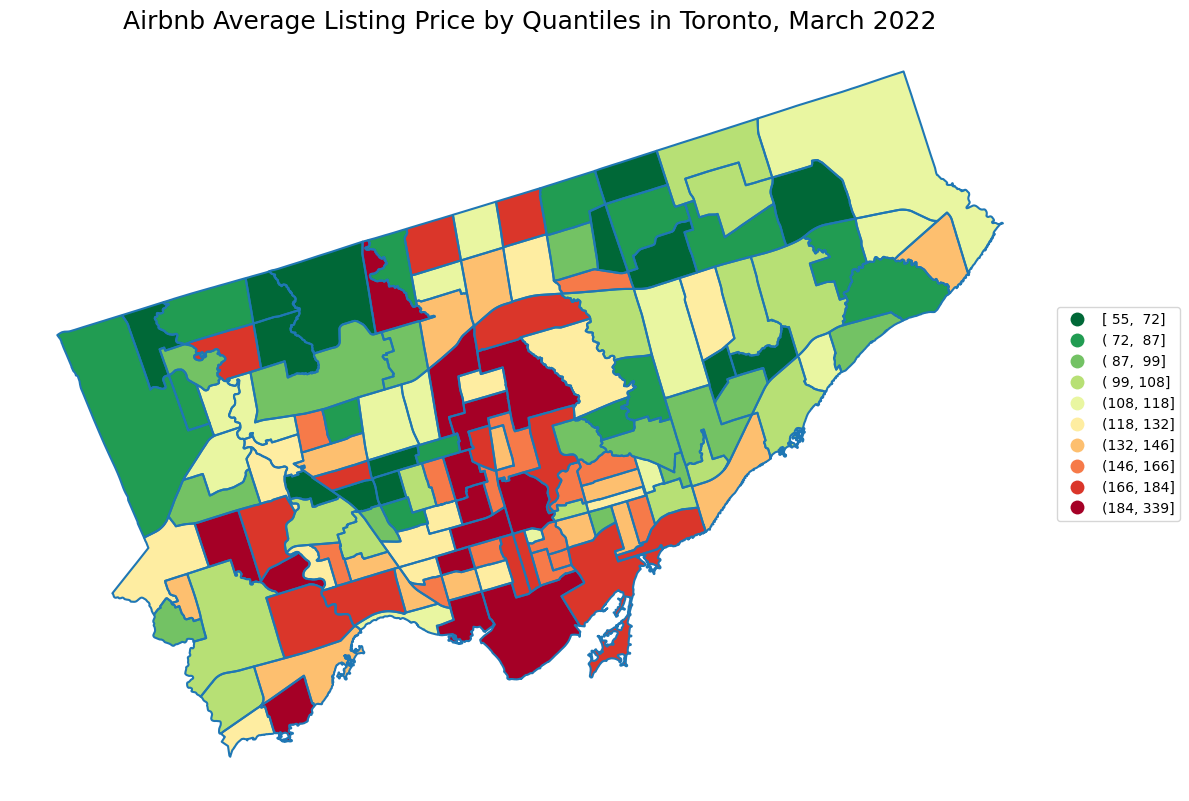

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_avg_price.plot(column='avg_price', scheme='quantiles', k=10, cmap='RdYlGn_r', legend=True, ax=ax,
                  legend_kwds={'loc':'center left', 'bbox_to_anchor':(1,0.5), 'fmt':"{:.0f}", 'interval':True})
gdf_avg_price.boundary.plot(ax=ax)
plt.title(f'Airbnb Average Listing Price by Quantiles in {city}, March 2022', fontsize = 18)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'Airbnb_price_{city}_quantiles.png')
plt.show()

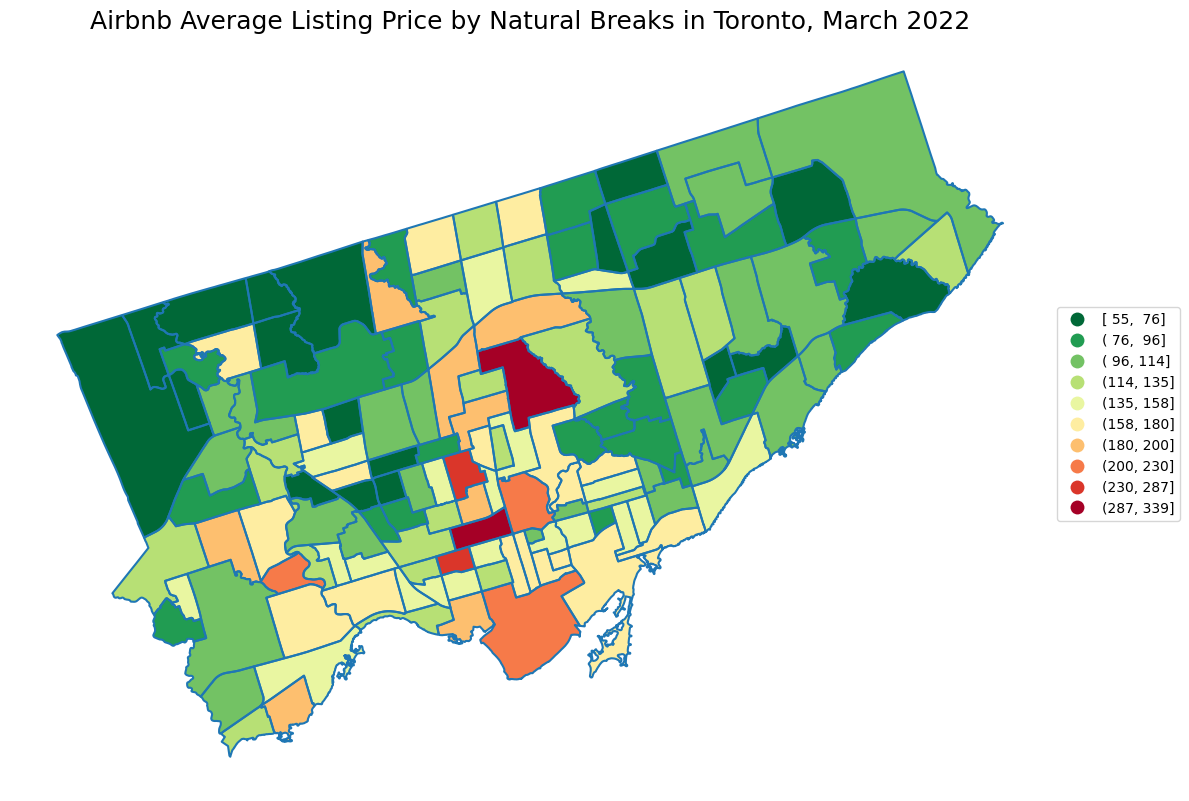

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_avg_price.plot(column='avg_price', scheme='natural_breaks', k=10, cmap='RdYlGn_r', legend=True, ax=ax,
                  legend_kwds={'loc':'center left', 'bbox_to_anchor':(1,0.5), 'fmt':"{:.0f}", 'interval':True})
gdf_avg_price.boundary.plot(ax=ax)
plt.title(f'Airbnb Average Listing Price by Natural Breaks in {city}, March 2022', fontsize = 18)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'Airbnb_price_{city}_natural_breaks.png')
plt.show()

**Global spatial autocorrelation with Moran’s I statistics**

In [17]:
#Spatial Similiarity
w = lps.weights.Queen.from_dataframe(gdf_avg_price)
w.transform = 'r'

#Attribute similarity
gdf_avg_price['weighted_price'] = lps.weights.lag_spatial(w, gdf_avg_price['avg_price'])

y = gdf_avg_price['avg_price']
moran = Moran(y, w)
print(f"Moran's I value: {moran.I}\np-value: {moran.p_sim}")

<ipython-input-17-a2fe9835950e>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(gdf_avg_price)


Moran's I value: 0.37939917945817603
p-value: 0.001


#**Local spatial autocorrelation with LISA statistics**

**local Moran’s I** values are interpreted as follows:

1.   Negative: nearby cases are dissimilar or dispersed e.g. High-Low or Low-High
2.   Neutral: nearby cases have no particular relationship or random, absence of pattern
3. Positive: nearby cases are similar or clustered e.g. High-High or Low-Low

**The LISA** uses to identify the clusters in localized map regions and categorize the clusters into five types:

1.   High-High (HH): the area having high values of the variable is surrounded by neighbors that also have high values
2. Low-Low (LL): the area having low values of the variable is surrounded by neighbors that also have low values
3. Low-High (LH): the area having low values of the variable is surrounded by neighbors that have high values
4. High-Low (HL): the area having high values of the variable is surrounded by neighbors that have low values Not Significant (NS)




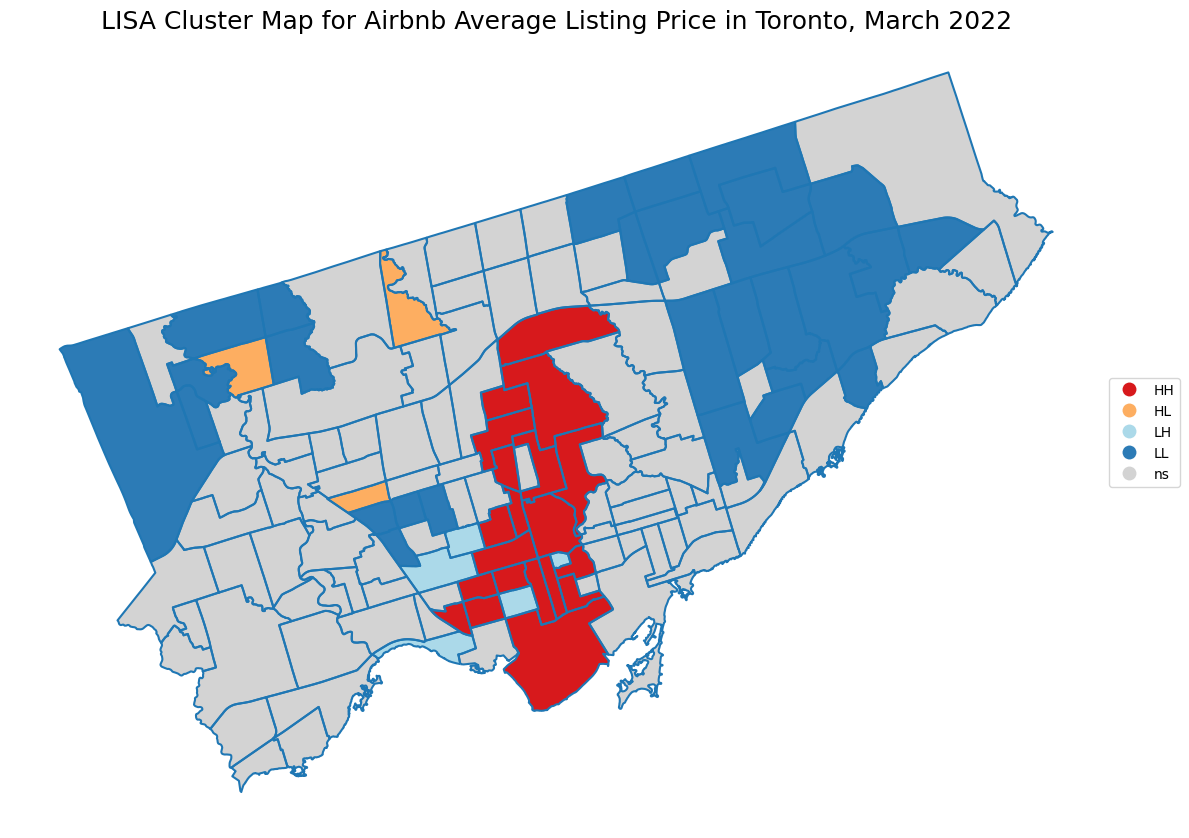

In [18]:
moran_local = Moran_Local(y, w)
P_VALUE = 0.05

fig, ax = plt.subplots(figsize=(12,10))
lisa_cluster(moran_local, gdf_avg_price, p=P_VALUE, ax=ax, legend=True,
             legend_kwds={'loc':'center left', 'bbox_to_anchor':(1,0.5), 'fmt':"{:.0f}"})
gdf_avg_price.boundary.plot(ax=ax)
plt.title(f'LISA Cluster Map for Airbnb Average Listing Price in {city}, March 2022', fontsize = 18)
plt.tight_layout()
plt.savefig(f'Airbnb_price_{city}_LISA_cluster_map.png')
plt.show()